In [1]:
import Merge_Cartesian 

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get Raw Wavefront Arrays

In [2]:
%matplotlib widget
L_Time = '1'
C_Time = '1'

L_impedance = '718'
C_impedance = '1.2'

number_periods = '1'

#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_impedance,L_Time,'1']
Capacitor_List = [C_impedance,C_Time,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

In [3]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Inductor,
Current_Inductor,
Voltage_Capacitor,
Current_Capacitor,
Time,
Wavefronts_Sending_Inductor,
Wavefronts_Sending_Capacitor,
Wavefronts_Returning_Inductor,
Wavefronts_Returning_Capacitor
) = Merge_Cartesian.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        359.0
Inductor Capacitance Per Length :       0.0006963788300835654596100278552
Inductor Length :                       1
Inductor Total Inductance :             359.0
Inductor Total Capacitance :            0.0006963788300835654596100278552
Inductor Velocity :                     2
Inductor Time Delay :                   0.5
Inductor Impedance :                    718

- The Capacitor -
Capacitor Inductance Per Length :       0.60
Capacitor Capacitance Per Length :      0.4166666666666666666666666667
Capacitor Length :                      1
Capacitor Total Inductance :            0.60
Capacitor Total Capacitance :           0.4166666666666666666666666667
Capacitor Velocity :                    2
Capacitor Time Delay :                  0.5
Capacitor Impedance :                   1.2

- The Time -
Number Periods :                        1
Simulation Stop Time :                  76.846036332304

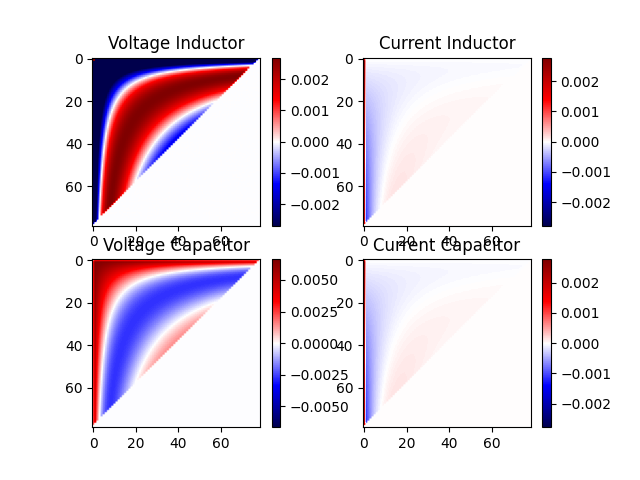

In [4]:
plt.figure()

plt.subplot(2,2,1)
plt.title("Voltage Inductor")
Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Contrast[0,0] = 0
max_boundary = np.max(Contrast)  

c = plt.imshow(Voltage_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

plt.subplot(2,2,2)
plt.title("Current Inductor")
max_boundary = np.max(Current_Inductor)  

c = plt.imshow(Current_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

plt.subplot(2,2,3)
plt.title("Voltage Capacitor")
max_boundary = np.max(Voltage_Capacitor)  

c = plt.imshow(Voltage_Capacitor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

plt.subplot(2,2,4)
plt.title("Current Capacitor")
max_boundary = np.max(Current_Capacitor)  

c = plt.imshow(Current_Capacitor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Trying to understand Fanout Frequency

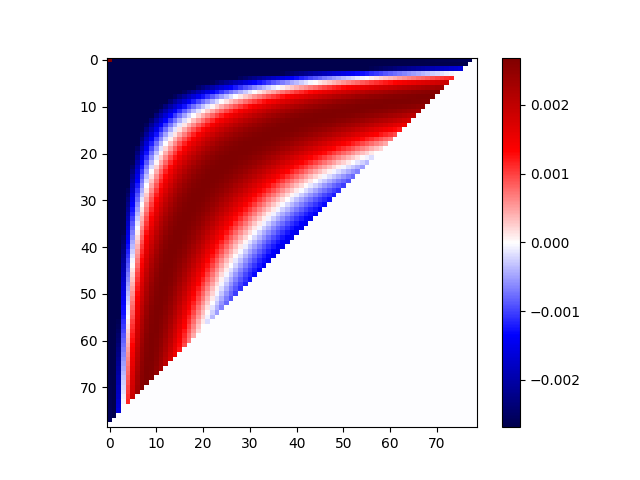

In [5]:
plt.figure()

Contrast = copy.copy(Voltage_Inductor.astype(np.float))
Contrast[0,0] = 0
max_boundary = np.max(Contrast)  
c = plt.imshow(Voltage_Inductor.astype(np.float),cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

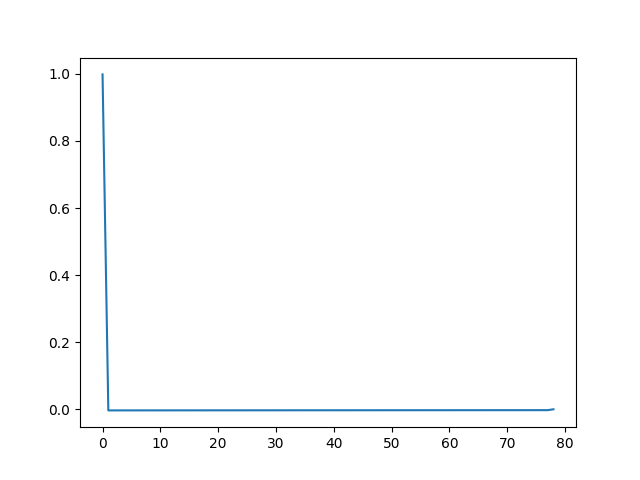

In [6]:
plt.figure()

row = Voltage_Inductor[0,:]

plt.plot(row)

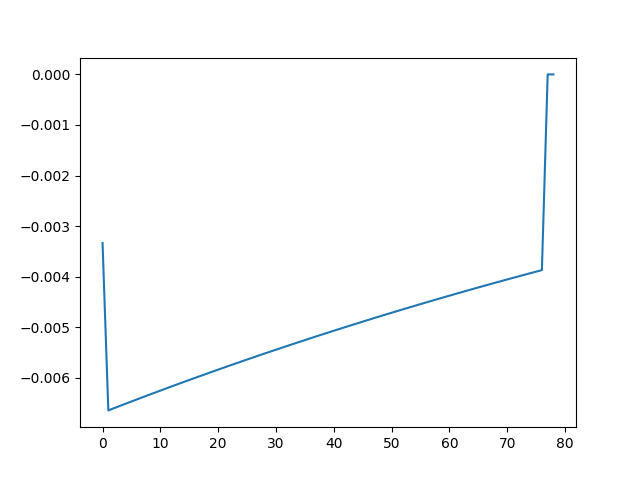

In [7]:
plt.figure()

row = Voltage_Inductor[1,:]

plt.plot(row)

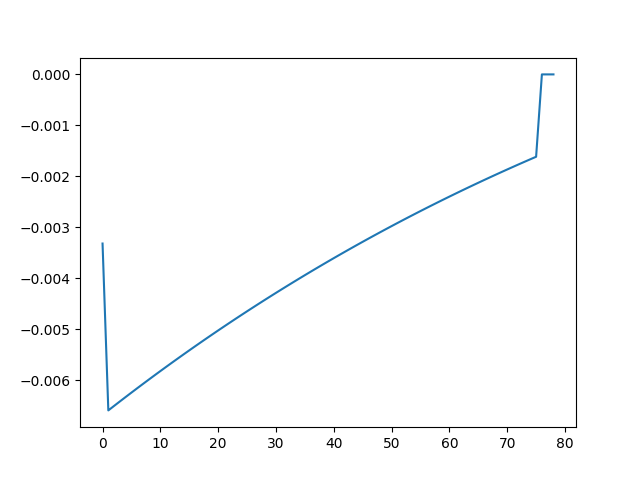

In [8]:
plt.figure()

row = Voltage_Inductor[2,:]

plt.plot(row)

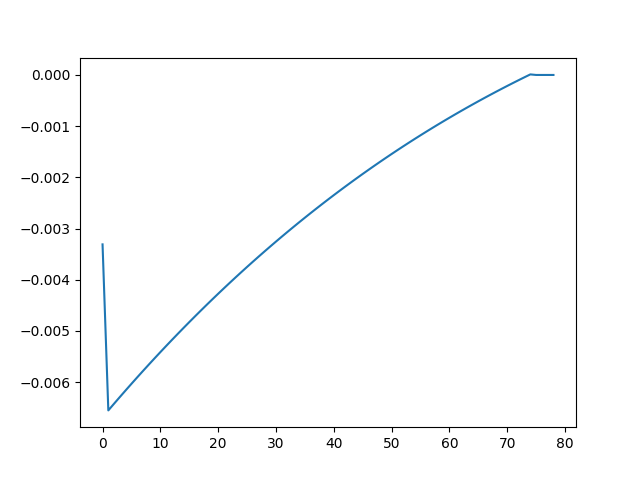

In [9]:
plt.figure()

row = Voltage_Inductor[3,:]

plt.plot(row)

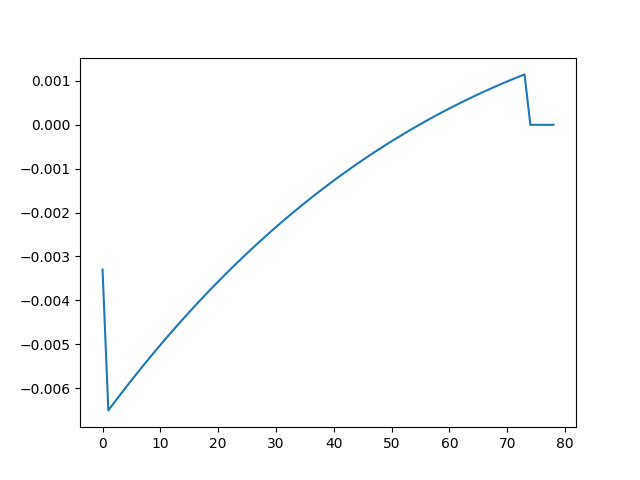

In [10]:
plt.figure()

row = Voltage_Inductor[4,:]

plt.plot(row)

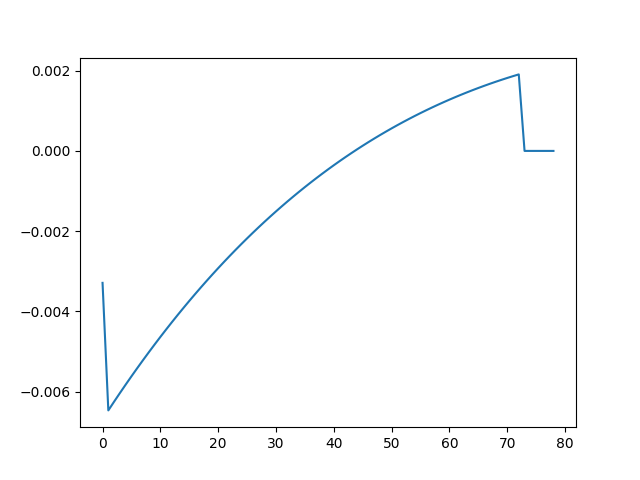

In [11]:
plt.figure()

row = Voltage_Inductor[5,:]

plt.plot(row)

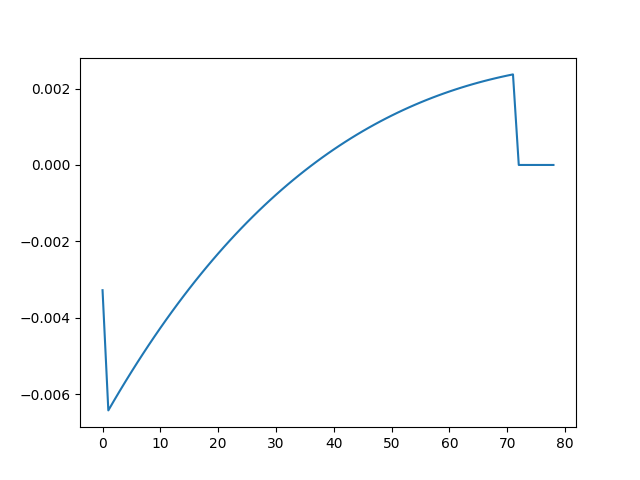

In [12]:
plt.figure()

row = Voltage_Inductor[6,:]

plt.plot(row)

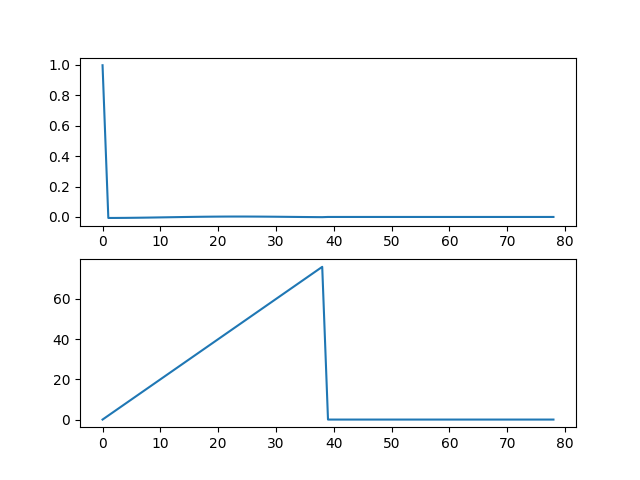

In [13]:
plt.figure()

plt.subplot(2,1,1)
row = Voltage_Inductor.diagonal()
plt.plot(row)


plt.subplot(2,1,2)
row = Time.diagonal()
plt.plot(row)

# Higher Order Merging

## Demonstrating co-factors and LCM -> array index 

In [14]:
Merge_Cartesian.LCM

Decimal('1.00')

In [15]:
Merge_Cartesian.GCD

Decimal('1')

In [16]:
Merge_Cartesian.Inductor_LCM_Factor

1

In [17]:
Merge_Cartesian.Capacitor_LCM_Factor

1

In [18]:
a = Merge_Cartesian.Inductor_LCM_Factor
b = Merge_Cartesian.Capacitor_LCM_Factor

In [19]:
if(Merge_Cartesian.is_Higher_Merging):
    print(Time[a,0])

1.0


In [20]:
if(Merge_Cartesian.is_Higher_Merging):
    print(Time[0,b])

1.0


## Functions for routine

In [21]:
def make_upper_and_lower(arr,b_factor):
    upper = arr[:,0:b_factor]
    lower = arr[:,b_factor:]
    
    padding_for_upper = np.full(lower.shape,0,dtype=lower.dtype)
    padding_for_lower = np.full(upper.shape,0,dtype=upper.dtype)
    
    upper= np.append(upper,padding_for_upper,axis=1)
    lower= np.append(lower,padding_for_lower,axis=1)
    
    return upper,lower

In [22]:
def shif_and_pad_array_x(arr,number_lines):
    
    rolled_arr = np.roll(arr, number_lines, axis=0)
    
    left_arr = rolled_arr[0:number_lines,:]
    left_arr = np.full(left_arr.shape,0,dtype=left_arr.dtype)
    
    
    rolled_arr= np.delete(rolled_arr,np.arange(0,number_lines,1),axis=0)
    rolled_arr = np.append(left_arr,rolled_arr,axis=0)
    
    return rolled_arr

In [23]:
def multiplicative_merge_cycle(arr,a_factor,b_factor):
    upper_arr,lower_arr = make_upper_and_lower(arr,b_factor)
    arr_merge_ready = shif_and_pad_array_x(lower_arr,a_factor)
    
    arr_merged = upper_arr + arr_merge_ready
    
    return arr_merged

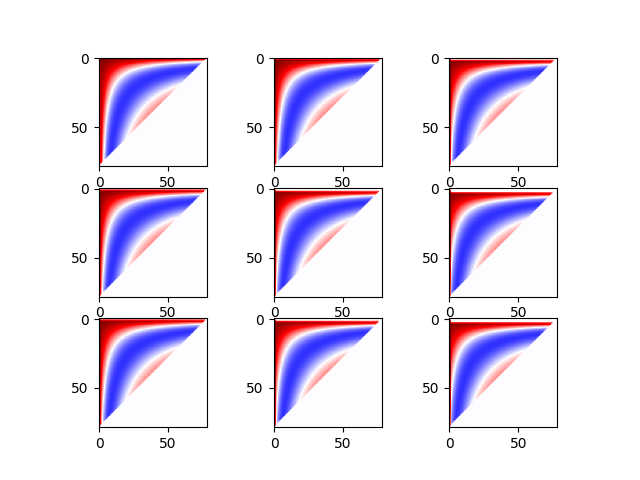

In [24]:
if(Merge_Cartesian.is_Higher_Merging):

    fig_merge,ax_merge = plt.subplots(3,3)

    # First Row
    c = ax_merge[0,0].imshow(Voltage_Capacitor.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[0,0])

    voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

    c = ax_merge[0,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[0,1])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[0,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[0,2])

    # Second Row
    voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

    c = ax_merge[1,0].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[1,0])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[1,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[1,1])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[1,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[1,2])

    # Third Row
    voltage_capacitor_merged = multiplicative_merge_cycle(Voltage_Capacitor,a,b)

    c = ax_merge[2,0].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[2,0])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[2,1].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[2,1])

    voltage_capacitor_merged = multiplicative_merge_cycle(voltage_capacitor_merged,a,b)

    c = ax_merge[2,2].imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(Voltage_Capacitor), vmin = - np.max(Voltage_Capacitor))
    # plt.colorbar(c, ax=ax_merge[2,2])

In [25]:
def multiplicative_merging(arr,a,b,number_of_layers):
    
    number_merge_cycles = math.ceil(number_of_layers/b) + 1
    
    for _ in range (0,number_merge_cycles):
        arr = multiplicative_merge_cycle(arr,a,b)

    return arr[:,0:b]

In [26]:
if(Merge_Cartesian.is_Higher_Merging):
    voltage_inductor_merged = multiplicative_merging(Voltage_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    current_inductor_merged = multiplicative_merging(Current_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    voltage_capacitor_merged = multiplicative_merging(Voltage_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
    current_capacitor_merged = multiplicative_merging(Current_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
    
    Wavefronts_Sending_Inductor_merged = multiplicative_merging (Wavefronts_Sending_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    Wavefronts_Sending_Capacitor_merged = multiplicative_merging (Wavefronts_Sending_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
    
    Wavefronts_Returning_Inductor_merged = multiplicative_merging (Wavefronts_Returning_Inductor,a,b,Merge_Cartesian.Number_of_Layers)
    Wavefronts_Returning_Capacitor_merged = multiplicative_merging (Wavefronts_Returning_Capacitor,a,b,Merge_Cartesian.Number_of_Layers)
else:
    voltage_inductor_merged = Voltage_Inductor
    current_inductor_merged = Current_Inductor
    voltage_capacitor_merged = Voltage_Capacitor
    current_capacitor_merged = Current_Capacitor
    
    Wavefronts_Sending_Inductor_merged = Wavefronts_Sending_Inductor
    Wavefronts_Sending_Capacitor_merged = Wavefronts_Sending_Capacitor
    
    Wavefronts_Returning_Inductor_merged = Wavefronts_Returning_Inductor
    Wavefronts_Returning_Capacitor_merged = Wavefronts_Returning_Capacitor

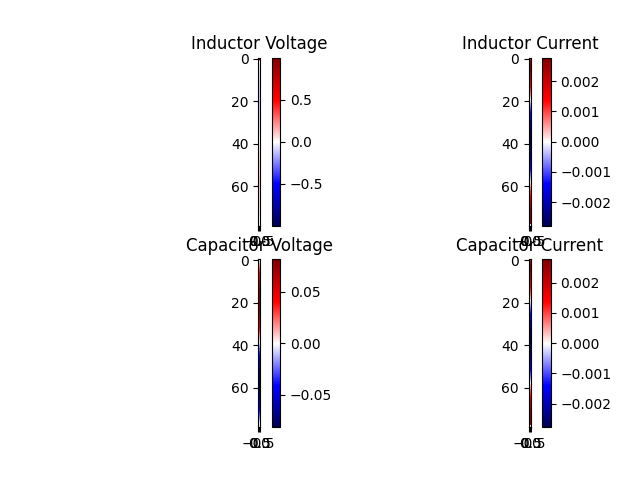

In [27]:
plt.figure()

plt.subplot(2,2,1)
plt.title("Inductor Voltage")
c = plt.imshow(voltage_inductor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_inductor_merged), vmin = - np.max(voltage_inductor_merged))
plt.colorbar(c)


plt.subplot(2,2,2)
plt.title("Inductor Current")
c = plt.imshow(current_inductor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(current_inductor_merged), vmin = - np.max(current_inductor_merged))
plt.colorbar(c)

plt.subplot(2,2,3)
plt.title("Capacitor Voltage")
c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

plt.subplot(2,2,4)
plt.title("Capacitor Current")
c = plt.imshow(current_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(current_capacitor_merged), vmin = - np.max(current_capacitor_merged))
plt.colorbar(c)


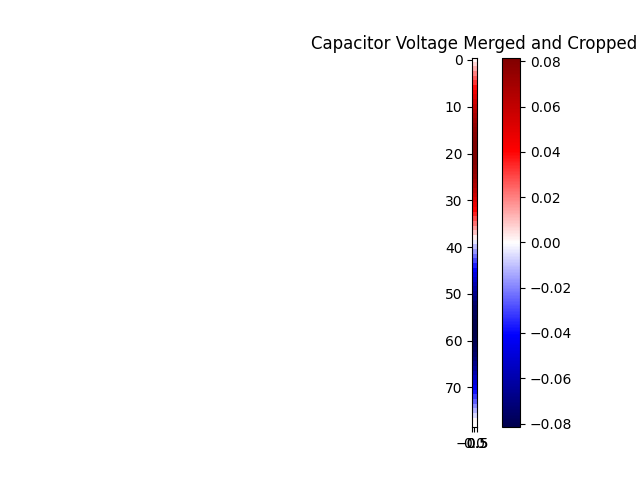

In [28]:
figclvmt,axclvmt =plt.subplots()

plt.title("Capacitor Voltage Merged and Cropped")
c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

## Follow Options Ordering

In [29]:
latest_time = 0

x_index = 0
y_index = 0

option_time = []
option_indexes =[]

out_time = []
out_indexes = []
out_voltage = []
out_current = []

Time_Merged = Time[:,0:Merge_Cartesian.b]
Marked = np.zeros(Time.shape,dtype=Time.dtype)
Voltage = voltage_capacitor_merged
Current = current_capacitor_merged

def store_options(input_arr,x,y,magnitude,indexes):
    x_size,y_size = input_arr.shape
    
    
    if(x+1 < x_size and Marked[x+1,y] == 0):
        
        option_a = input_arr[x+1,y]
        magnitude.append(option_a)
        indexes.append([x+1,y])
        Marked[x+1,y] = 1
    
    if(y+1 < y_size and Marked[x,y+1] == 0):
        
        option_b = input_arr[x,y+1]
        magnitude.append(option_b)
        indexes.append([x,y+1])
        Marked[x,y+1] = 1
    
def get_best_option_value_index(opt_arr,opt_indexes):
    opt_index_min = np.argmin(opt_arr)
    
    value = opt_arr[opt_index_min]
    del opt_arr[opt_index_min]
    
    index = opt_indexes[opt_index_min]
    del opt_indexes[opt_index_min]
    
    return value, index


# Store Initial Point
out_time.append(Time_Merged[0,0])
out_indexes.append([0,0])
out_voltage.append(Voltage[0,0])
out_current.append(Current[0,0])
Marked[0,0] = 1

while latest_time < Merge_Cartesian.Simulation_Stop_Time:
    
    # store options at location
    store_options(Time_Merged,x_index,y_index,option_time,option_indexes)
    
    
    if(len(option_time) > 0):
        # get best option
        best_time, best_time_index = get_best_option_value_index(option_time,option_indexes)
        
        out_time.append(best_time)
        out_indexes.append(best_time_index)
        
        out_voltage.append(Voltage[best_time_index[0],best_time_index[1]] )
        out_current.append(Current[best_time_index[0],best_time_index[1]] )
        
        Marked[best_time_index[0],best_time_index[1]]  = 2
    
    latest_time = best_time
    x_index, y_index = best_time_index

In [30]:
voltage_capacitor_cropped = voltage_capacitor_merged [0:out_indexes[-1][0],:]
current_capacitor_cropped = current_capacitor_merged [0:out_indexes[-1][0],:]

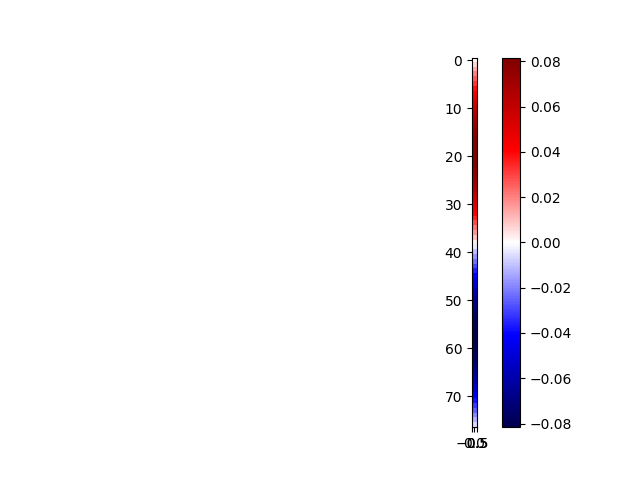

In [31]:
plt.figure()

c = plt.imshow(voltage_capacitor_cropped.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

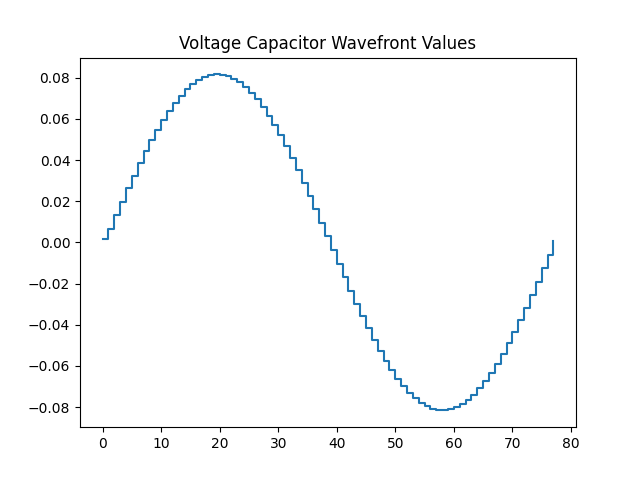

In [32]:
fig_series_voltage,ax_series_voltage =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(out_time,out_voltage,where='post')


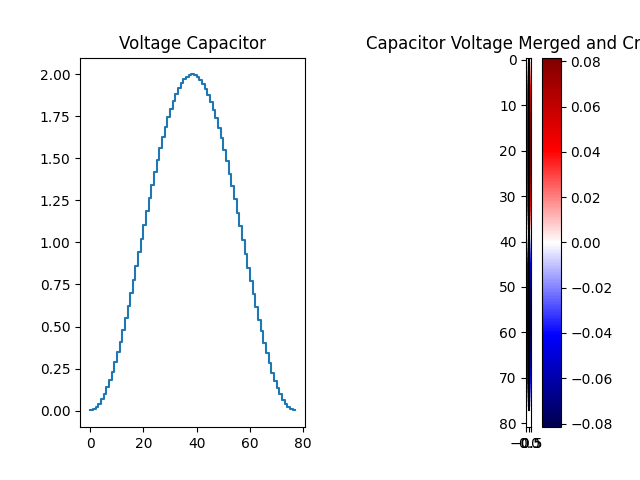

In [33]:
integrated_voltage = np.cumsum(out_voltage)  
plt.figure()

plt.subplot(1,2,1)
plt.title("Voltage Capacitor")
plt.step(out_time,integrated_voltage,where='post')

plt.subplot(1,2,2)
plt.title("Capacitor Voltage Merged and Cropped")

c = plt.imshow(voltage_capacitor_cropped.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

for i,index in enumerate(out_indexes):
    if(i  == 0):
        pass
    else:
        x1 = out_indexes[i-1][0]
        y1 = out_indexes[i-1][1]
        
        x2 = index[0]
        y2 = index[1]
        plt.plot([y1,y2],[x1,x2],'black')
    
    

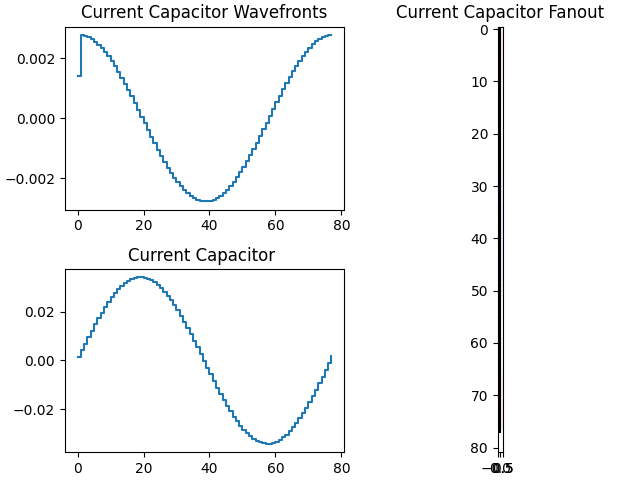

In [34]:
integrated_current = np.cumsum(out_current)  
ax = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AC
    BC
    """
)

ax["A"].set_title("Current Capacitor Wavefronts")
ax["A"].step(out_time,out_current,where='post')


ax["B"].set_title("Current Capacitor ")
ax["B"].step(out_time,integrated_current,where='post')

ax["C"].set_title("Current Capacitor Fanout")
c = ax["C"].imshow(current_capacitor_cropped.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
# plt.colorbar(c,ax = ax["C"])

for i,index in enumerate(out_indexes):
    if(i  == 0):
        pass
    else:
        x1 = out_indexes[i-1][0]
        y1 = out_indexes[i-1][1]
        
        x2 = index[0]
        y2 = index[1]
        ax["C"].plot([y1,y2],[x1,x2],'black')


## Gradient Follow

In [35]:
A = Decimal(L_Time)
B = Decimal(C_Time)

LCM , GCF = Merge_Cartesian.lcm_gcd(A,B)

a = int((B)/(GCF))
b = int((A)/(GCF))

A_to_B_x = 0
A_to_B_y = 0

for  y in range(1,Merge_Cartesian.Number_of_Wavefronts):
    
    if( (y*B - GCF )%A == 0):
        A_to_B_x = (y*B - GCF)/A
        A_to_B_y = y
        break
    
    if(y == Merge_Cartesian.Number_of_Wavefronts -1):
        print('Eish')
        

B_to_A_x = 0
B_to_A_y = 0

for  y in range(1,Merge_Cartesian.Number_of_Wavefronts):
    
    if( (y*B + GCF )%A == 0):
        B_to_A_x = (y*B + GCF)/A
        B_to_A_y = y
        break
    
    if(y == Merge_Cartesian.Number_of_Wavefronts -1):
        print('Eish')

print('A :',A)
print('B :',B)
print('GCF :',GCF)
print('LCM :',LCM)
print('a :',a)
print('b :',b)
print('A_to_B_x : ' + str(A_to_B_x))
print('A_to_B_y : ' + str(A_to_B_y))
print('B_to_A_x : ' + str(B_to_A_x))
print('B_to_A_y : ' + str(B_to_A_y))

A : 1
B : 1
GCF : 1
LCM : 1
a : 1
b : 1
A_to_B_x : 0
A_to_B_y : 1
B_to_A_x : 2
B_to_A_y : 1


In [36]:
Merge_Cartesian.Number_of_Wavefronts

12324